#### Installing package to download the data from kaggle. Nevertheless, the data is provided in the project

In [ ]:
!pip install opendatasets

In [2]:
import opendatasets as od

od.download(
	"https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification/download?datasetVersionNumber=1")


Skipping, found downloaded files in "./butterfly-image-classification" (use force=True to force download)


In [44]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('butterfly-image-classification/Training_set.csv')

In [6]:
# Code used to put the images inside a folder with the class name
"""for result in df_sample.itertuples():
  file = result[1]
  folder = result[2]
  # print(file, folder)
  if not os.path.exists(folder):
      os.makedirs(folder)
  destination = os.path.join(folder, os.path.basename(file))
  shutil.copy(file, destination)"""

'for result in df_sample.itertuples():\n  file = result[1]\n  folder = result[2]\n  # print(file, folder)\n  if not os.path.exists(folder):\n      os.makedirs(folder)\n  destination = os.path.join(folder, os.path.basename(file))\n  shutil.copy(file, destination)'

### Import tensorflow libaries

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

#### Cheking an image

In [8]:
path ='/home/dashel/Documents/zoomcamp/capstone-2/butterfly-image-classification/train'
f_name = '/ADONIS/Image_1712.jpg'

In [9]:
full_name = f'{path}/{f_name}'

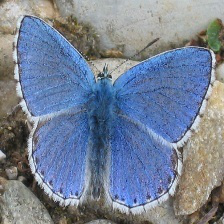

In [10]:
img = load_img(full_name)
img

In [12]:
x = np.array(img)
x.shape

(224, 224, 3)

> By default all images have a size of (224,224,3)

### Pre-trained convolutional neural networks
> Pre-trained models: https://keras.io/api/applications/

### Loading the ResNet50 pre-train model from keras application API

In [13]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

In [15]:
# Making a model for testing
model = ResNet50(weights='imagenet', include_top=True, input_shape=(224, 224, 3))

In [16]:
X = np.array([x])
X.shape

(1, 224, 224, 3)

In [17]:
X = preprocess_input(X)

In [19]:
# Making a prediction
pred = model.predict(X)

1/1 [==============================] - 0s 25ms/step


In [20]:
# Decode the prediction 
decode_predictions(pred)

[[('n02281787', 'lycaenid', 0.9957669),
  ('n02277742', 'ringlet', 0.0039932965),
  ('n02276258', 'admiral', 0.00019576224),
  ('n02280649', 'cabbage_butterfly', 3.1387324e-05),
  ('n02281406', 'sulphur_butterfly', 4.481149e-06)]]

- Result => 'lycaenid', 0.9957669
> Lycaenidae is the second-largest family of butterflies (behind Nymphalidae, brush-footed butterflies), with over 6,000 species worldwide,[1] whose members are also called gossamer-winged butterflies. They constitute about 30% of the known butterfly species. 

### Transfer learning

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Making a train dataset for the neural network

In [22]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [23]:
train_ds = train_gen.flow_from_directory(path,
                                        target_size=(150,150),
                                        batch_size=32)

Found 6499 images belonging to 75 classes.


In [24]:
train_ds.class_indices

{'ADONIS': 0,
 'AFRICAN GIANT SWALLOWTAIL': 1,
 'AMERICAN SNOOT': 2,
 'AN 88': 3,
 'APPOLLO': 4,
 'ATALA': 5,
 'BANDED ORANGE HELICONIAN': 6,
 'BANDED PEACOCK': 7,
 'BECKERS WHITE': 8,
 'BLACK HAIRSTREAK': 9,
 'BLUE MORPHO': 10,
 'BLUE SPOTTED CROW': 11,
 'BROWN SIPROETA': 12,
 'CABBAGE WHITE': 13,
 'CAIRNS BIRDWING': 14,
 'CHECQUERED SKIPPER': 15,
 'CHESTNUT': 16,
 'CLEOPATRA': 17,
 'CLODIUS PARNASSIAN': 18,
 'CLOUDED SULPHUR': 19,
 'COMMON BANDED AWL': 20,
 'COMMON WOOD-NYMPH': 21,
 'COPPER TAIL': 22,
 'CRECENT': 23,
 'CRIMSON PATCH': 24,
 'DANAID EGGFLY': 25,
 'EASTERN COMA': 26,
 'EASTERN DAPPLE WHITE': 27,
 'EASTERN PINE ELFIN': 28,
 'ELBOWED PIERROT': 29,
 'GOLD BANDED': 30,
 'GREAT EGGFLY': 31,
 'GREAT JAY': 32,
 'GREEN CELLED CATTLEHEART': 33,
 'GREY HAIRSTREAK': 34,
 'INDRA SWALLOW': 35,
 'IPHICLUS SISTER': 36,
 'JULIA': 37,
 'LARGE MARBLE': 38,
 'MALACHITE': 39,
 'MANGROVE SKIPPER': 40,
 'MESTRA': 41,
 'METALMARK': 42,
 'MILBERTS TORTOISESHELL': 43,
 'MONARCH': 44,
 'MOURNING

In [25]:
X, y = next(train_ds)

In [26]:
y[:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Validation data preparation 

In [27]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [28]:
val_path ='/home/dashel/Documents/zoomcamp/capstone-2/butterfly-image-classification/valid'

In [29]:
val_ds = val_gen.flow_from_directory(val_path,
                                    target_size=(150,150),
                                    batch_size=32) 

Found 375 images belonging to 75 classes.


In [99]:
# Getting a list of the classes for future use
classes = list(val_ds.class_indices.keys())
classes

['ADONIS',
 'AFRICAN GIANT SWALLOWTAIL',
 'AMERICAN SNOOT',
 'AN 88',
 'APPOLLO',
 'ATALA',
 'BANDED ORANGE HELICONIAN',
 'BANDED PEACOCK',
 'BECKERS WHITE',
 'BLACK HAIRSTREAK',
 'BLUE MORPHO',
 'BLUE SPOTTED CROW',
 'BROWN SIPROETA',
 'CABBAGE WHITE',
 'CAIRNS BIRDWING',
 'CHECQUERED SKIPPER',
 'CHESTNUT',
 'CLEOPATRA',
 'CLODIUS PARNASSIAN',
 'CLOUDED SULPHUR',
 'COMMON BANDED AWL',
 'COMMON WOOD-NYMPH',
 'COPPER TAIL',
 'CRECENT',
 'CRIMSON PATCH',
 'DANAID EGGFLY',
 'EASTERN COMA',
 'EASTERN DAPPLE WHITE',
 'EASTERN PINE ELFIN',
 'ELBOWED PIERROT',
 'GOLD BANDED',
 'GREAT EGGFLY',
 'GREAT JAY',
 'GREEN CELLED CATTLEHEART',
 'GREY HAIRSTREAK',
 'INDRA SWALLOW',
 'IPHICLUS SISTER',
 'JULIA',
 'LARGE MARBLE',
 'MALACHITE',
 'MANGROVE SKIPPER',
 'MESTRA',
 'METALMARK',
 'MILBERTS TORTOISESHELL',
 'MONARCH',
 'MOURNING CLOAK',
 'ORANGE OAKLEAF',
 'ORANGE TIP',
 'ORCHARD SWALLOW',
 'PAINTED LADY',
 'PAPER KITE',
 'PEACOCK',
 'PINE WHITE',
 'PIPEVINE SWALLOW',
 'POPINJAY',
 'PURPLE HAIRS

### Making the model base model

In [32]:
base_model = ResNet50(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [33]:
base_model.trainable = False

In [34]:
inputs = keras.Input(shape=(150,150,3))

In [35]:
base = base_model(inputs, training=False)

In [36]:
vectors = keras.layers.GlobalAveragePooling2D()(base)

In [37]:
inner1 = keras.layers.Dense(512, activation='relu')(vectors)
inner2 = keras.layers.Dense(256, activation='relu')(inner1)
inner3 = keras.layers.Dense(256, activation='relu')(inner2)
    
outputs = keras.layers.Dense(75)(inner3)

In [38]:
model = keras.Model(inputs, outputs)

In [39]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [40]:
history = model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20


2023-12-18 10:23:57.744972: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-18 10:23:58.926524: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f2bf0d9cce0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-18 10:23:58.926546: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2023-12-18 10:23:58.936592: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1702916639.019219   20555 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


204/204 [==============================] - 19s 72ms/step - loss: 3.4046 - accuracy: 0.1873 - val_loss: 2.2150 - val_accuracy: 0.3947
Epoch 2/20
204/204 [==============================] - 12s 57ms/step - loss: 1.9413 - accuracy: 0.4391 - val_loss: 1.6824 - val_accuracy: 0.5280
Epoch 3/20
204/204 [==============================] - 12s 57ms/step - loss: 1.4759 - accuracy: 0.5595 - val_loss: 1.5729 - val_accuracy: 0.5360
Epoch 4/20
204/204 [==============================] - 12s 56ms/step - loss: 1.3146 - accuracy: 0.6032 - val_loss: 1.5225 - val_accuracy: 0.5840
Epoch 5/20
204/204 [==============================] - 12s 56ms/step - loss: 1.2925 - accuracy: 0.6239 - val_loss: 1.3326 - val_accuracy: 0.6267
Epoch 6/20
204/204 [==============================] - 12s 57ms/step - loss: 1.0127 - accuracy: 0.6916 - val_loss: 1.0323 - val_accuracy: 0.6987
Epoch 7/20
204/204 [==============================] - 12s 57ms/step - loss: 0.9316 - accuracy: 0.7190 - val_loss: 1.3037 - val_accuracy: 0.6667
Epo

> Best accuaray for the model with the validation dataset is 0.76 

### Function to make model for easier testing

In [41]:
def make_model(learning_rate=0.01, size_inner1=512, size_inner2=256, size_inner3=256, input_shape=150):
    base_model = ResNet50(weights='imagenet', 
                          include_top = False,
                          input_shape=(input_shape,input_shape,3))
    base_model.trainable = False

    #################################################################################
    inputs = keras.Input(shape=(input_shape,input_shape,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner1 = keras.layers.Dense(512, activation='relu')(vectors)
    inner2 = keras.layers.Dense(256, activation='relu')(inner1)
    inner3 = keras.layers.Dense(256, activation='relu')(inner2)      
    outputs = keras.layers.Dense(75)(inner3)
    model = keras.Model(inputs, outputs)

    ##################################################################################
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

    return model

### Testing with different learning rate

In [42]:
scores = {}

for learning_rate in [0.001, 0.01, 0.03, 0.1]:
    print(learning_rate)

    model = make_model(
        learning_rate=learning_rate,
    )

    history = model.fit(train_ds, epochs=20, validation_data=val_ds)
    scores[learning_rate] = history.history

    print()
    print()

0.001
Epoch 1/20
204/204 [==============================] - 15s 58ms/step - loss: 1.5351 - accuracy: 0.6079 - val_loss: 0.6285 - val_accuracy: 0.8160
Epoch 2/20
204/204 [==============================] - 11s 56ms/step - loss: 0.5127 - accuracy: 0.8467 - val_loss: 0.5079 - val_accuracy: 0.8533
Epoch 3/20
204/204 [==============================] - 11s 55ms/step - loss: 0.2962 - accuracy: 0.9100 - val_loss: 0.4554 - val_accuracy: 0.8693
Epoch 4/20
204/204 [==============================] - 11s 56ms/step - loss: 0.2399 - accuracy: 0.9229 - val_loss: 0.4977 - val_accuracy: 0.8693
Epoch 5/20
204/204 [==============================] - 12s 56ms/step - loss: 0.1500 - accuracy: 0.9472 - val_loss: 0.5144 - val_accuracy: 0.8773
Epoch 6/20
204/204 [==============================] - 11s 56ms/step - loss: 0.1214 - accuracy: 0.9597 - val_loss: 0.5894 - val_accuracy: 0.8613
Epoch 7/20
204/204 [==============================] - 12s 56ms/step - loss: 0.1127 - accuracy: 0.9640 - val_loss: 0.5204 - val_acc

### Graphing the result

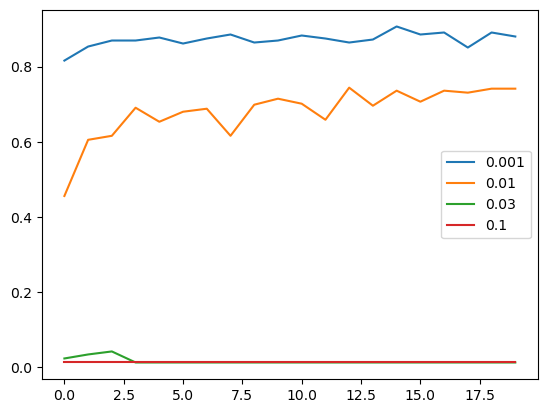

In [45]:
hist = scores[0.001]
plt.plot(hist['val_accuracy'], label=0.001)

hist = scores[0.01]
plt.plot(hist['val_accuracy'], label=0.01)

hist = scores[0.03]
plt.plot(hist['val_accuracy'], label=0.03)

hist = scores[0.1]
plt.plot(hist['val_accuracy'], label=0.1)

plt.legend()

In [48]:
learning_rate = 0.001

> We will used 0.001 learning rate for future models

### Trying with bigger size images and Data augmentation

In [46]:
input_size = 224

In [47]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
    shear_range=0.2, # shear the image
    zoom_range=0.2, # zoom into the image
    width_shift_range=0.2, # shift the image width ways
    height_shift_range=0.2, # shift the image height ways
    horizontal_flip=True
)


train_ds = train_gen.flow_from_directory(
    path,
    target_size=(input_size, input_size),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    val_path,
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 6499 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


In [49]:
model = make_model(
        learning_rate=learning_rate, input_shape=input_size
    )

In [50]:
history = model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
204/204 [==============================] - 70s 321ms/step - loss: 1.8123 - accuracy: 0.5347 - val_loss: 0.8892 - val_accuracy: 0.7253
Epoch 2/20
204/204 [==============================] - 63s 308ms/step - loss: 0.6937 - accuracy: 0.7975 - val_loss: 0.6463 - val_accuracy: 0.7787
Epoch 3/20
204/204 [==============================] - 62s 306ms/step - loss: 0.4623 - accuracy: 0.8584 - val_loss: 0.5211 - val_accuracy: 0.8427
Epoch 4/20
204/204 [==============================] - 64s 312ms/step - loss: 0.4298 - accuracy: 0.8677 - val_loss: 0.4511 - val_accuracy: 0.8400
Epoch 5/20
204/204 [==============================] - 64s 311ms/step - loss: 0.3484 - accuracy: 0.8886 - val_loss: 0.4425 - val_accuracy: 0.8720
Epoch 6/20
204/204 [==============================] - 64s 314ms/step - loss: 0.3076 - accuracy: 0.9004 - val_loss: 0.3595 - val_accuracy: 0.8853
Epoch 7/20
204/204 [==============================] - 66s 324ms/step - loss: 0.2345 - accuracy: 0.9235 - val_loss: 0.3985 - val_ac

### Adding callback to save the best models

In [51]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'resnet_50_v1{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [52]:
history = model.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/20
204/204 [==============================] - ETA: 0s - loss: 0.1190 - accuracy: 0.9617

/home/dashel/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


204/204 [==============================] - 63s 310ms/step - loss: 0.1190 - accuracy: 0.9617 - val_loss: 0.4041 - val_accuracy: 0.8960
Epoch 2/20
204/204 [==============================] - 64s 311ms/step - loss: 0.1293 - accuracy: 0.9601 - val_loss: 0.4224 - val_accuracy: 0.9093
Epoch 3/20
204/204 [==============================] - 65s 319ms/step - loss: 0.1577 - accuracy: 0.9523 - val_loss: 0.4117 - val_accuracy: 0.8987
Epoch 4/20
204/204 [==============================] - 65s 318ms/step - loss: 0.1183 - accuracy: 0.9631 - val_loss: 0.3634 - val_accuracy: 0.9067
Epoch 5/20
204/204 [==============================] - 65s 318ms/step - loss: 0.1087 - accuracy: 0.9648 - val_loss: 0.4273 - val_accuracy: 0.8960
Epoch 6/20
204/204 [==============================] - 64s 315ms/step - loss: 0.1118 - accuracy: 0.9634 - val_loss: 0.4895 - val_accuracy: 0.8987
Epoch 7/20
204/204 [==============================] - 65s 319ms/step - loss: 0.1176 - accuracy: 0.9611 - val_loss: 0.5040 - val_accuracy: 0.8

### Using the best model with new pictures

In [53]:
resnet50_model = keras.models.load_model('resnet_50_v117_0.920.h5')

In [55]:
path = './butterfly-image-classification/adonis_bf_test2'
img = load_img(path, target_size=(224, 224))

In [56]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 224, 224, 3)

In [57]:
X = preprocess_input(X)

In [58]:
pred = resnet50_model.predict(X)

1/1 [==============================] - 1s 630ms/step


In [59]:
pred

array([[  5.7614026,  -8.1622   ,  -7.103367 ,  -9.5503645,  -3.2516625,
         -0.8285153,  -4.4976215,  -3.756156 ,  -1.2035187,  -8.8752775,
         -4.28441  ,  -6.7269735,  -6.4292774,  -5.4113784,  -6.239185 ,
         -5.0317698,  -5.550455 ,  -6.246207 ,  -4.851578 ,  -7.3603287,
         -9.290156 ,  -3.6754637,  -7.649737 , -11.056334 , -11.079133 ,
         -9.994668 ,  -9.126622 ,  -0.8099685,  -4.0183825,  -7.1368513,
         -9.334982 ,  -5.448256 ,  -3.1640863,  -4.803031 ,  -3.4162683,
          0.4507593, -12.214599 ,  -8.872609 ,  -2.34116  ,  -6.82764  ,
          1.1969422,  -3.3372521,  -1.2214633,  -2.5441604,  -5.4576154,
         -5.490649 ,  -7.083494 ,  -6.5340986,  -4.467292 ,  -8.333499 ,
         -3.4345477,  -9.572422 ,   2.448271 ,  -1.3248111,  -8.677873 ,
         -1.4122009,  -5.5344896,  -9.641753 ,  -9.116178 ,  -4.6321335,
         -3.2615707,  -5.973095 ,  -0.4354135,  -8.336805 , -11.398488 ,
         -2.6688266,  -6.0065303,  -7.3815575, -10.

In [60]:
result = dict(zip(classes, pred[0]))

In [61]:
max(result, key=result.get)

'ADONIS'

### I will try a different pre-train model  to see if I get a better result (EfficientNet)

In [62]:
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2M, preprocess_input, decode_predictions

In [63]:
def make_model_eff_net(learning_rate=0.01, size_inner1=512, size_inner2=256, size_inner3=256, input_shape=150):
    base_model = EfficientNetV2M(weights='imagenet', 
                          include_top = False,
                          input_shape=(input_shape,input_shape,3))
    base_model.trainable = False

    #################################################################################
    inputs = keras.Input(shape=(input_shape,input_shape,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner1 = keras.layers.Dense(512, activation='relu')(vectors)
    inner2 = keras.layers.Dense(256, activation='relu')(inner1)
    inner3 = keras.layers.Dense(256, activation='relu')(inner2)      
    outputs = keras.layers.Dense(75)(inner3)
    model = keras.Model(inputs, outputs)

    ##################################################################################
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

    return model

In [64]:
eff_net_model = make_model_eff_net(
        learning_rate=0.001, input_shape=224
    )

In [66]:
path_for_eff ='/home/dashel/Documents/zoomcamp/capstone-2/butterfly-image-classification/train'

In [67]:
train_gen_eff_net = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
    shear_range=0.2, # shear the image
    zoom_range=0.2, # zoom into the image
    width_shift_range=0.2, # shift the image width ways
    height_shift_range=0.2, # shift the image height ways
    horizontal_flip=True
)


train_eff_net_ds = train_gen_eff_net.flow_from_directory(
    path_for_eff,
    target_size=(input_size, input_size),
    batch_size=32
)

val_gen_eff_net = ImageDataGenerator(preprocessing_function=preprocess_input)

val_eff_net_ds = train_gen_eff_net.flow_from_directory(
    val_path,
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 6499 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


In [68]:
eff_net_history = eff_net_model.fit(train_eff_net_ds, epochs=20, validation_data=val_eff_net_ds)

Epoch 1/20
204/204 [==============================] - 85s 343ms/step - loss: 2.5433 - accuracy: 0.3167 - val_loss: 1.5398 - val_accuracy: 0.5440
Epoch 2/20
204/204 [==============================] - 67s 326ms/step - loss: 1.1598 - accuracy: 0.6475 - val_loss: 0.8674 - val_accuracy: 0.7307
Epoch 3/20
204/204 [==============================] - 68s 333ms/step - loss: 0.8248 - accuracy: 0.7443 - val_loss: 0.8186 - val_accuracy: 0.7413
Epoch 4/20
204/204 [==============================] - 66s 325ms/step - loss: 0.6730 - accuracy: 0.7861 - val_loss: 0.6738 - val_accuracy: 0.7733
Epoch 5/20
204/204 [==============================] - 67s 329ms/step - loss: 0.5742 - accuracy: 0.8158 - val_loss: 0.6596 - val_accuracy: 0.7760
Epoch 6/20
204/204 [==============================] - 70s 340ms/step - loss: 0.5514 - accuracy: 0.8229 - val_loss: 0.6037 - val_accuracy: 0.8133
Epoch 7/20
204/204 [==============================] - 70s 344ms/step - loss: 0.4766 - accuracy: 0.8443 - val_loss: 0.5010 - val_ac

In [69]:
eff_pred = eff_net_model.predict(X)

1/1 [==============================] - 5s 5s/step


In [70]:
eff_result = dict(zip(classes, eff_pred[0]))
max(eff_result, key=eff_result.get)

'SCARCE SWALLOW'

> We will used the ResNet50 model

### Convert model to TF-Lite

In [71]:
converter = tf.lite.TFLiteConverter.from_keras_model(resnet50_model)

In [72]:
tf_lite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpb0xstiit/assets


INFO:tensorflow:Assets written to: /tmp/tmpb0xstiit/assets
2023-12-18 15:28:43.194909: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2023-12-18 15:28:43.194935: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2023-12-18 15:28:43.195272: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpb0xstiit
2023-12-18 15:28:43.215299: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2023-12-18 15:28:43.215344: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmpb0xstiit
2023-12-18 15:28:43.257363: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2023-12-18 15:28:43.282220: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2023-12-18 15:28:43.836361: I tensorflow/cc/saved_model/loader.cc:217] Running initializatio

In [74]:
with open('butterfly-model.tflite', 'wb') as f_out:
    f_out.write(tf_lite_model)

### Importing the tensorflow lite model and using it

In [75]:
import tensorflow.lite as tflite

In [76]:
interpreter = tflite.Interpreter(model_path='butterfly-model.tflite')

#### Getting input and output index

In [77]:
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [82]:
input_idx = interpreter.get_input_details()[0]['index']
input_idx

0

In [83]:
output_idx = interpreter.get_output_details()[0]['index']
output_idx

194

#### Set model and get prediction

In [84]:
interpreter.set_tensor(input_idx, X)

In [85]:
interpreter.invoke()

In [86]:
tflite_pred = interpreter.get_tensor(output_idx)

In [87]:
tflite_result = dict(zip(classes, tflite_pred[0]))
max(tflite_result, key=tflite_result.get)

'ADONIS'

### Making a lighter version for the packages

In [88]:
!pip install keras-image-helper

In [89]:
!pip install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime

Looking in indexes: https://pypi.org/simple, https://google-coral.github.io/py-repo/
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 5.8 MB/s eta 0:00:000:00:010:00:01:02


In [92]:
import tflite_runtime.interpreter as tflite
from keras_image_helper import create_preprocessor

In [95]:
preprocessor = create_preprocessor('resnet50', target_size=(224, 224))

In [96]:
X = preprocessor.from_path('butterfly-image-classification/adonis_bf_test')

In [97]:
interpreter = tflite.Interpreter(model_path='butterfly-model.tflite')
interpreter.allocate_tensors()

input_idx = interpreter.get_input_details()[0]['index']
output_idx = interpreter.get_output_details()[0]['index']

interpreter.set_tensor(input_idx, X)
interpreter.invoke()
tflite_new_pred = interpreter.get_tensor(output_idx)

In [98]:
tflite_result = dict(zip(classes, tflite_new_pred[0]))
max(tflite_result, key=tflite_result.get)

'ADONIS'